In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../Dataset/income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
df.isna().sum()

Name         0
Age          0
Income($)    0
dtype: int64

In [5]:
df.duplicated().sum()

0

Text(0, 0.5, 'Income')

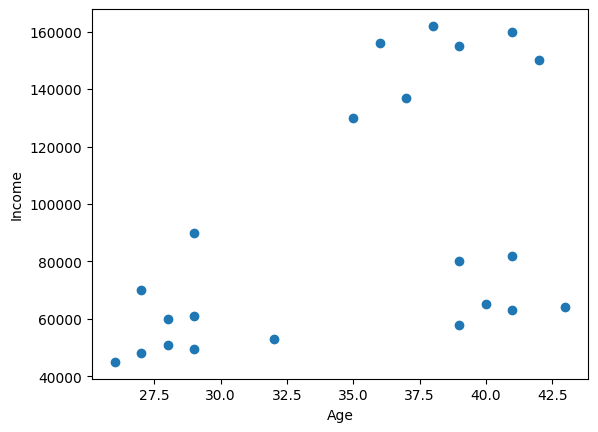

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [7]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Age','Income($)']])
y_predict


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
df['clustor']=y_predict
df.head()

,Name,Age,Income($),clustor
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
km.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.60000000e+01, 1.33500000e+05]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


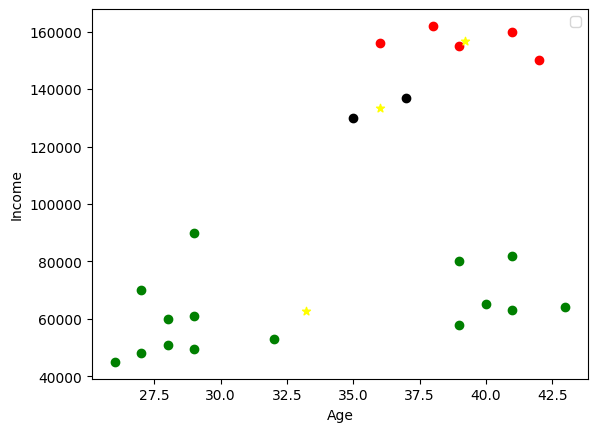

In [10]:
df1 = df[df['clustor']==0]
df2 = df[df['clustor']==1]
df3 = df[df['clustor']==2]

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="black")
plt.scatter(km.cluster_centers_[: ,0],km.cluster_centers_[: ,1],color="yellow",marker="*")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[["Age"]])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [12]:
df.head()

,Name,Age,Income($),clustor
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


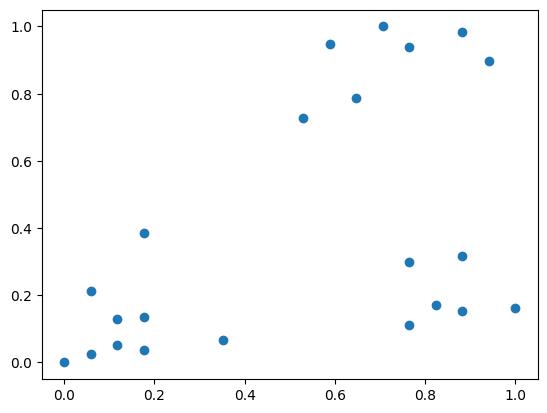

In [13]:
plt.scatter(df.Age,df['Income($)'])

In [14]:
km = KMeans(n_clusters=3)
y_predict_new = km.fit_predict(df[['Age','Income($)']])
y_predict_new

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [15]:
df['clustor'] = y_predict_new
df

,Name,Age,Income($),clustor
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


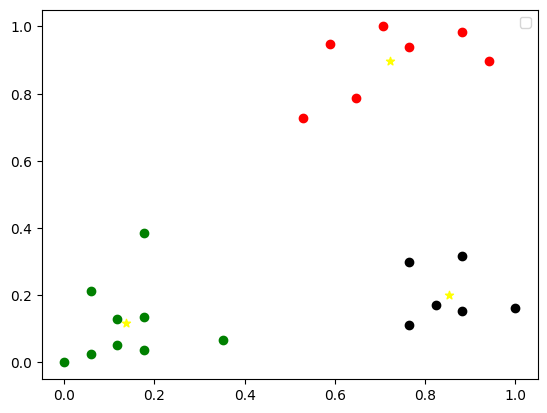

In [20]:
df1 = df[df['clustor']==0]
df2 = df[df['clustor']==1]
df3 = df[df['clustor']==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age, df3['Income($)'],color="black")
plt.scatter(km.cluster_centers_[: ,0],km.cluster_centers_[: ,1],color='yellow',marker="*")

plt.xlabel("Age")
plt.ylabel("Income($)")

In [21]:
sse =[]
k_rng = range(1,11)

for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)

    

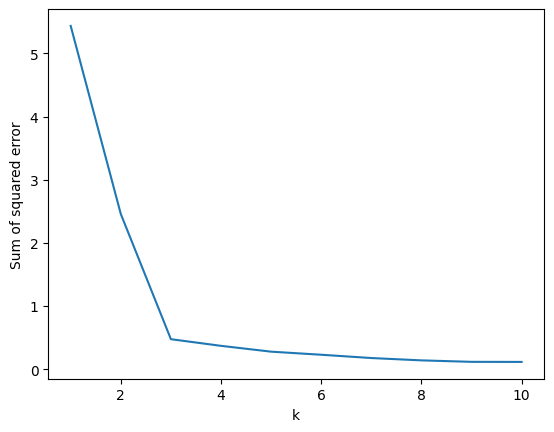

In [23]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)